# Introduction

The dataset is from kaggle you can view it and understand columns from this link
https://www.kaggle.com/lava18/google-play-store-apps


## Questions

- What is the most expensive app on the store.
- Which Genre has more apps.
- What is the average size of the free apps & paid apps.
- What is the 5 top expenisve apps that has rate of 5.
- How many apps that has more than 50K reviews.
- What is the average price of the apps for each genre with each installs numbers.
- How many apps have rating > 4.7 and what is thier avg price.
- How much google earned from the 5,000,000+ installed apps
- What is the max and min size for free and paid apps.
- is there a correlation between rating, Reviews, Size with the price of the app
- How many apps for each type for each content reading.
- How many apps that can work on android version 4

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

In [2]:
data=pd.read_csv('googleplaystore.csv')

In [3]:
data.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

  Reviews  Size    Installs  Type Price Content Rating  \
0     159   19M     10,000+  Free     0       Everyone   
1     967   14M    500,000+  Free     0       Everyone   
2   87510  8.7M  5,000,000+  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up  
2               Art & Design    August 1, 2018       1.2.4  4.0.3 and up

In [4]:
data.tail(3)

App             Category  \
10838                         Parkinson Exercices FR              MEDICAL   
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating             Genres      Last Updated         Current Ver  \
10838       Everyone            Medical  January 20, 2017                 1.0   
10839     Mature 17+  Books & Reference  January 19, 2015  Varies with device   
10840       Everyone          Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
10838          2.2 and up  
10839  Varies with device  
10840  Varies with device

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
for reviews in data['Reviews'].unique():
    print(reviews)

159
967
87510
215644
167
178
36815
13791
121
13880
8788
44829
4326
1518
55
3632
27
194216
224399
450
654
7699
61
118
192
20260
203
136
223
1120
227
5035
1015
353
564
8145
36639
158
591
117
176
295221
2206
26
174531
1070
85
845
367
1598
284
17057
129
542
10479
805
1403
3971
534
7774
38846
2431
6090
295
190
40211
356
52530
116986
1379
271920
736
7021
197
737
3574
994
197136
142
15168
2155
138
5414
21777
348
250
13372
7880
3617
4806
65786
31433
5097
1754
2680
1288
18900
49790
1150
1739
32090
2225
4369
8572
964
42050
104
17934
601
36
187
182
30
134
74
113715
3595
9315
75
38
26834
119
2277
2280
184
9
77
35
364
18
473
66
3871
257
62
2914724
1857
4478
577550
814080
246315
454060
155446
418
22486
203130
1435
116507
1433233
90468
860
363934
87873
17506
1862
2084
47303
19080
161
85842
7831
91615
4620
21336
26875
1778
2709
64513
8342
527
1322
1680
2739
1065
233757
2
51269
30105
156
114
341157
16129
674730
1254730
85185
32584
217730
70991
1002861
16589
148945
4458
62272
8941
46353
1279184
88073
67

In [7]:
data['Reviews']=pd.to_numeric(data['Reviews'],errors='coerce')
data.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

   Reviews  Size    Installs  Type Price Content Rating  \
0    159.0   19M     10,000+  Free     0       Everyone   
1    967.0   14M    500,000+  Free     0       Everyone   
2  87510.0  8.7M  5,000,000+  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up  
2               Art & Design    August 1, 2018       1.2.4  4.0.3 and up

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [9]:
for s in data['Size'].unique():
    print(s)

19M
14M
8.7M
25M
2.8M
5.6M
29M
33M
3.1M
28M
12M
20M
21M
37M
2.7M
5.5M
17M
39M
31M
4.2M
7.0M
23M
6.0M
6.1M
4.6M
9.2M
5.2M
11M
24M
Varies with device
9.4M
15M
10M
1.2M
26M
8.0M
7.9M
56M
57M
35M
54M
201k
3.6M
5.7M
8.6M
2.4M
27M
2.5M
16M
3.4M
8.9M
3.9M
2.9M
38M
32M
5.4M
18M
1.1M
2.2M
4.5M
9.8M
52M
9.0M
6.7M
30M
2.6M
7.1M
3.7M
22M
7.4M
6.4M
3.2M
8.2M
9.9M
4.9M
9.5M
5.0M
5.9M
13M
73M
6.8M
3.5M
4.0M
2.3M
7.2M
2.1M
42M
7.3M
9.1M
55M
23k
6.5M
1.5M
7.5M
51M
41M
48M
8.5M
46M
8.3M
4.3M
4.7M
3.3M
40M
7.8M
8.8M
6.6M
5.1M
61M
66M
79k
8.4M
118k
44M
695k
1.6M
6.2M
18k
53M
1.4M
3.0M
5.8M
3.8M
9.6M
45M
63M
49M
77M
4.4M
4.8M
70M
6.9M
9.3M
10.0M
8.1M
36M
84M
97M
2.0M
1.9M
1.8M
5.3M
47M
556k
526k
76M
7.6M
59M
9.7M
78M
72M
43M
7.7M
6.3M
334k
34M
93M
65M
79M
100M
58M
50M
68M
64M
67M
60M
94M
232k
99M
624k
95M
8.5k
41k
292k
11k
80M
1.7M
74M
62M
69M
75M
98M
85M
82M
96M
87M
71M
86M
91M
81M
92M
83M
88M
704k
862k
899k
378k
266k
375k
1.3M
975k
980k
4.1M
89M
696k
544k
525k
920k
779k
853k
720k
713k
772k
318k
58k
241k


In [10]:
def fix_size(s):
    try:
        
        if s.endswith('M'):
            return float(s[:-1])
        elif s.endswith('K'):
            return float(s[:-1])/1024
        elif s == '1,000+':
                return 1.0 
        else:
                return np.nan
    except:
        return np.nan

In [11]:
data['Size']=data['Size'].apply(fix_size)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            8830 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [13]:
for p in data['Price'].unique():
    print(p)

0
$4.99
$3.99
$6.99
$1.49
$2.99
$7.99
$5.99
$3.49
$1.99
$9.99
$7.49
$0.99
$9.00
$5.49
$10.00
$24.99
$11.99
$79.99
$16.99
$14.99
$1.00
$29.99
$12.99
$2.49
$10.99
$1.50
$19.99
$15.99
$33.99
$74.99
$39.99
$3.95
$4.49
$1.70
$8.99
$2.00
$3.88
$25.99
$399.99
$17.99
$400.00
$3.02
$1.76
$4.84
$4.77
$1.61
$2.50
$1.59
$6.49
$1.29
$5.00
$13.99
$299.99
$379.99
$37.99
$18.99
$389.99
$19.90
$8.49
$1.75
$14.00
$4.85
$46.99
$109.99
$154.99
$3.08
$2.59
$4.80
$1.96
$19.40
$3.90
$4.59
$15.46
$3.04
$4.29
$2.60
$3.28
$4.60
$28.99
$2.95
$2.90
$1.97
$200.00
$89.99
$2.56
$30.99
$3.61
$394.99
$1.26
Everyone
$1.20
$1.04


In [14]:
def fix_price(p):
    try:
        if p.startswith('$'):
            return float(p[1:])
        else:
            return 0.0
    except:
        return np.nan

In [15]:
data['Price']=data['Price'].apply(fix_price)

In [16]:
data.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

   Reviews  Size    Installs  Type  Price Content Rating  \
0    159.0  19.0     10,000+  Free    0.0       Everyone   
1    967.0  14.0    500,000+  Free    0.0       Everyone   
2  87510.0   8.7  5,000,000+  Free    0.0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up  
2               Art & Design    August 1, 2018       1.2.4  4.0.3 and up

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            8830 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [18]:
data.describe()

Rating       Reviews         Size         Price
count  9367.000000  1.084000e+04  8830.000000  10841.000000
mean      4.193338  4.441529e+05    22.268131      1.027273
std       0.537431  2.927761e+06    22.628542     15.948971
min       1.000000  0.000000e+00     1.000000      0.000000
25%       4.000000  3.800000e+01     5.400000      0.000000
50%       4.300000  2.094000e+03    14.000000      0.000000
75%       4.500000  5.477550e+04    31.000000      0.000000
max      19.000000  7.815831e+07   100.000000    400.000000

In [19]:
idx=data[data['Rating']>5].index
idx

Int64Index([10472], dtype='int64')

In [20]:
data.drop(idx ,axis=0 , inplace=True)

In [21]:
data.describe()

Rating       Reviews         Size         Price
count  9366.000000  1.084000e+04  8829.000000  10840.000000
mean      4.191757  4.441529e+05    22.270540      1.027368
std       0.515219  2.927761e+06    22.628691     15.949703
min       1.000000  0.000000e+00     1.000000      0.000000
25%       4.000000  3.800000e+01     5.400000      0.000000
50%       4.300000  2.094000e+03    14.000000      0.000000
75%       4.500000  5.477550e+04    31.000000      0.000000
max       5.000000  7.815831e+07   100.000000    400.000000

In [22]:
for c in data['Category'].unique():
    print(c)

ART_AND_DESIGN
AUTO_AND_VEHICLES
BEAUTY
BOOKS_AND_REFERENCE
BUSINESS
COMICS
COMMUNICATION
DATING
EDUCATION
ENTERTAINMENT
EVENTS
FINANCE
FOOD_AND_DRINK
HEALTH_AND_FITNESS
HOUSE_AND_HOME
LIBRARIES_AND_DEMO
LIFESTYLE
GAME
FAMILY
MEDICAL
SOCIAL
SHOPPING
PHOTOGRAPHY
SPORTS
TRAVEL_AND_LOCAL
TOOLS
PERSONALIZATION
PRODUCTIVITY
PARENTING
WEATHER
VIDEO_PLAYERS
NEWS_AND_MAGAZINES
MAPS_AND_NAVIGATION


In [23]:
data['Category'] = data['Category'].apply(lambda c: c.lower())

for c in data['Category'].unique():
    print(c)

art_and_design
auto_and_vehicles
beauty
books_and_reference
business
comics
communication
dating
education
entertainment
events
finance
food_and_drink
health_and_fitness
house_and_home
libraries_and_demo
lifestyle
game
family
medical
social
shopping
photography
sports
travel_and_local
tools
personalization
productivity
parenting
weather
video_players
news_and_magazines
maps_and_navigation


In [24]:
for c in data['Installs'].unique():
    print(c)

10,000+
500,000+
5,000,000+
50,000,000+
100,000+
50,000+
1,000,000+
10,000,000+
5,000+
100,000,000+
1,000,000,000+
1,000+
500,000,000+
50+
100+
500+
10+
1+
5+
0+
0


In [25]:
for c in data['Type'].unique():
    print(c)

Free
Paid
nan


In [26]:
for c in data['Content Rating'].unique():
    print(c)

Everyone
Teen
Everyone 10+
Mature 17+
Adults only 18+
Unrated


In [27]:
data.sample()

App         Category  Rating  Reviews  Size  \
7257  Wallpapers DAF CF 85 Trucks  personalization     NaN      0.0  16.0   

     Installs  Type  Price Content Rating           Genres    Last Updated  \
7257      10+  Free    0.0           Teen  Personalization  April 29, 2017   

     Current Ver Android Ver  
7257         1.0  4.1 and up

In [28]:
data.drop(['Current Ver','Last Updated','Genres'] , axis=1 , inplace=True)
data.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  art_and_design     4.1   
1                                Coloring book moana  art_and_design     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  art_and_design     4.7   

   Reviews  Size    Installs  Type  Price Content Rating   Android Ver  
0    159.0  19.0     10,000+  Free    0.0       Everyone  4.0.3 and up  
1    967.0  14.0    500,000+  Free    0.0       Everyone  4.0.3 and up  
2  87510.0   8.7  5,000,000+  Free    0.0       Everyone  4.0.3 and up

In [29]:
for v in data['Android Ver'].unique():
    print(v)

4.0.3 and up
4.2 and up
4.4 and up
2.3 and up
3.0 and up
4.1 and up
4.0 and up
2.3.3 and up
Varies with device
2.2 and up
5.0 and up
6.0 and up
1.6 and up
1.5 and up
2.1 and up
7.0 and up
5.1 and up
4.3 and up
4.0.3 - 7.1.1
2.0 and up
3.2 and up
4.4W and up
7.1 and up
7.0 - 7.1.1
8.0 and up
5.0 - 8.0
3.1 and up
2.0.1 and up
4.1 - 7.1.1
nan
5.0 - 6.0
1.0 and up
2.2 - 7.1.1
5.0 - 7.1.1


In [30]:
def check_ver_4(version):
    try:
        if version.startswith('4'):
            return 'Yes'
        else:
            return 'No'
    except:
        return np.nan

In [31]:
data['version_y_n']=data['Android Ver'].apply(check_ver_4)

In [32]:
data.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  art_and_design     4.1   
1                                Coloring book moana  art_and_design     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  art_and_design     4.7   

   Reviews  Size    Installs  Type  Price Content Rating   Android Ver  \
0    159.0  19.0     10,000+  Free    0.0       Everyone  4.0.3 and up   
1    967.0  14.0    500,000+  Free    0.0       Everyone  4.0.3 and up   
2  87510.0   8.7  5,000,000+  Free    0.0       Everyone  4.0.3 and up   

  version_y_n  
0         Yes  
1         Yes  
2         Yes

In [33]:
data.drop('Android Ver', axis=1, inplace=True)
data

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       art_and_design   
1                                    Coloring book moana       art_and_design   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       art_and_design   
3                                  Sketch - Draw & Paint       art_and_design   
4                  Pixel Draw - Number Art Coloring Book       art_and_design   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               family   
10837                   Fr. Mike Schmitz Audio Teachings               family   
10838                             Parkinson Exercices FR              medical   
10839                      The SCP Foundation DB fr nn5n  books_and_reference   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            lifestyle   

       Rating   Reviews  Size     Installs  Type  Price Content Rating  \
0         4.1     159.0  19.0      10,000+  Free    0.0       Everyone   
1         3.9     967.0  14.0     500,000+  Free    0.0       Everyone   
2         4.7   87510.0   8.7   5,000,000+  Free    0.0       Everyone   
3         4.5  215644.0  25.0  50,000,000+  Free    0.0           Teen   
4         4.3     967.0   2.8     100,000+  Free    0.0       Everyone   
...       ...       ...   ...          ...   ...    ...            ...   
10836     4.5      38.0  53.0       5,000+  Free    0.0       Everyone   
10837     5.0       4.0   3.6         100+  Free    0.0       Everyone   
10838     NaN       3.0   9.5       1,000+  Free    0.0       Everyone   
10839     4.5     114.0   NaN       1,000+  Free    0.0     Mature 17+   
10840     4.5  398307.0  19.0  10,000,000+  Free    0.0       Everyone   

      version_y_n  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
...           ...  
10836         Yes  
10837         Yes  
10838          No  
10839          No  
10840          No  

[10840 rows x 10 columns]

In [34]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              2011
Installs             0
Type                 1
Price                0
Content Rating       0
version_y_n          2
dtype: int64

In [35]:
for R in data['Rating'].unique():
    print(R)

4.1
3.9
4.7
4.5
4.3
4.4
3.8
4.2
4.6
3.2
4.0
nan
4.8
4.9
3.6
3.7
3.3
3.4
3.5
3.1
5.0
2.6
3.0
1.9
2.5
2.8
2.7
1.0
2.9
2.3
2.2
1.7
2.0
1.8
2.4
1.6
2.1
1.4
1.5
1.2


In [36]:
data['Rating']=pd.to_numeric(data['Rating'],errors='coerce')
data.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  art_and_design     4.1   
1                                Coloring book moana  art_and_design     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  art_and_design     4.7   

   Reviews  Size    Installs  Type  Price Content Rating version_y_n  
0    159.0  19.0     10,000+  Free    0.0       Everyone         Yes  
1    967.0  14.0    500,000+  Free    0.0       Everyone         Yes  
2  87510.0   8.7  5,000,000+  Free    0.0       Everyone         Yes

In [37]:
data.shape

(10840, 10)

In [38]:
data.shape[0]

10840

In [39]:
(data.isna().sum()/data.shape[0])*100

App                0.000000
Category           0.000000
Rating            13.597786
Reviews            0.000000
Size              18.551661
Installs           0.000000
Type               0.009225
Price              0.000000
Content Rating     0.000000
version_y_n        0.018450
dtype: float64

In [40]:
from sklearn.impute import SimpleImputer

In [41]:
imputer = SimpleImputer(strategy='most_frequent')

data['version_y_n'] = imputer.fit_transform(data[['version_y_n']])
data['Type'] = imputer.fit_transform(data[['Type']])

In [42]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              2011
Installs             0
Type                 0
Price                0
Content Rating       0
version_y_n          0
dtype: int64

In [43]:
data.duplicated().sum()

485

In [44]:
data.drop_duplicates(inplace=True)

In [45]:
data.shape

(10355, 10)

In [46]:
from sklearn.impute import KNNImputer

In [47]:
imputer=KNNImputer()

In [48]:
data['Rating']=imputer.fit_transform(data[['Rating']])
data['Size']=imputer.fit_transform(data[['Size']])

In [49]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
version_y_n       0
dtype: int64

In [50]:
data.describe()

Rating       Reviews          Size         Price
count  10355.000000  1.035500e+04  10355.000000  10355.000000
mean       4.187885  4.059634e+05     22.060489      1.031000
std        0.484066  2.697035e+06     20.482836     16.280191
min        1.000000  0.000000e+00      1.000000      0.000000
25%        4.100000  3.200000e+01      6.600000      0.000000
50%        4.200000  1.677000e+03     20.000000      0.000000
75%        4.500000  4.636100e+04     26.000000      0.000000
max        5.000000  7.815831e+07    100.000000    400.000000

In [51]:
from datasist.structdata import detect_outliers

In [52]:
idx = detect_outliers(data, 0, ['Rating', 'Reviews', 'Size', 'Price'])
idx

[15,
 87,
 159,
 176,
 209,
 311,
 312,
 325,
 477,
 492,
 501,
 510,
 513,
 514,
 518,
 520,
 522,
 527,
 528,
 533,
 546,
 555,
 572,
 578,
 611,
 619,
 625,
 645,
 663,
 684,
 694,
 862,
 869,
 885,
 915,
 1056,
 1057,
 1186,
 1190,
 1213,
 1217,
 1263,
 1472,
 1491,
 1528,
 1548,
 1561,
 1571,
 1576,
 1591,
 1594,
 1782,
 1784,
 2087,
 2249,
 2260,
 2264,
 2266,
 2295,
 2300,
 2317,
 2327,
 2329,
 2337,
 2351,
 2355,
 2360,
 2403,
 2408,
 2411,
 2412,
 2428,
 2487,
 2492,
 2531,
 2535,
 2702,
 2824,
 3001,
 3021,
 3023,
 3034,
 3131,
 3133,
 3137,
 3139,
 3146,
 3165,
 3247,
 3250,
 3262,
 3268,
 3271,
 3273,
 3279,
 3460,
 3483,
 3698,
 3709,
 3741,
 3748,
 3891,
 3938,
 3955,
 3961,
 3962,
 3963,
 3972,
 3979,
 4006,
 4010,
 4062,
 4066,
 4078,
 4127,
 4135,
 4161,
 4164,
 4165,
 4168,
 4171,
 4181,
 4187,
 4194,
 4209,
 4210,
 4226,
 4230,
 4251,
 4253,
 4258,
 4331,
 4361,
 4373,
 4375,
 4386,
 4389,
 4392,
 4470,
 4492,
 4493,
 4497,
 4498,
 4509,
 4511,
 4512,
 4522,
 4547,
 

In [53]:
outliers=data.loc[idx]
clean=data.drop(idx ,axis=0 )

In [54]:
outliers

App             Category    Rating  \
15     Learn To Draw Kawaii Characters       art_and_design  3.200000   
87       RST - Sale of cars on the PCT    auto_and_vehicles  3.200000   
159                     Cloud of Books  books_and_reference  3.300000   
176                   Free Book Reader  books_and_reference  3.400000   
209                    Plugin:AOT v5.0             business  3.100000   
...                                ...                  ...       ...   
10735                      FP VoiceBot               family  4.187885   
10760                  Fast Tract Diet   health_and_fitness  4.400000   
10782          Trine 2: Complete Story                 game  3.800000   
10785                     sugar, sugar               family  4.200000   
10798             Word Search Tab 1 FR               family  4.187885   

       Reviews       Size    Installs  Type  Price Content Rating version_y_n  
15        55.0   2.700000      5,000+  Free   0.00       Everyone         Yes  
87       250.0   1.100000    100,000+  Free   0.00       Everyone         Yes  
159     1862.0  19.000000  1,000,000+  Free   0.00       Everyone         Yes  
176     1680.0   4.000000    100,000+  Free   0.00       Everyone         Yes  
209     4034.0  22.060489    100,000+  Free   0.00       Everyone          No  
...        ...        ...         ...   ...    ...            ...         ...  
10735     17.0  22.060489        100+  Paid   0.99     Mature 17+          No  
10760     35.0   2.400000      1,000+  Paid   7.99       Everyone         Yes  
10782    252.0  11.000000     10,000+  Paid  16.99           Teen          No  
10785   1405.0   9.500000     10,000+  Paid   1.20       Everyone          No  
10798      0.0  22.060489         50+  Paid   1.04       Everyone          No  

[3734 rows x 10 columns]

In [55]:
data.shape

(10355, 10)

In [114]:
data.sample(3)

App  Category    Rating  \
2714  Ibotta: Cash Back Savings, Rewards & Coupons App  shopping  4.500000   
5253                            AJ Rafael Music Lyrics    family  4.187885   
6419                                         K-Rain BL     tools  4.000000   

       Reviews  Size     Installs  Type  Price Content Rating version_y_n  
2714  315908.0  52.0  10,000,000+  Free    0.0       Everyone         Yes  
5253       0.0   8.4          50+  Free    0.0   Everyone 10+         Yes  
6419       9.0  33.0       1,000+  Free    0.0       Everyone         Yes

H:\install anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

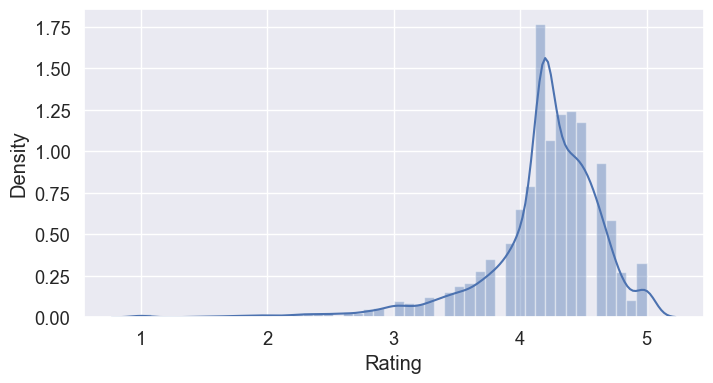

In [130]:
plt.figure(figsize=(8,4))
sns.distplot(data['Rating'])

(array([ 433.,  853.,  437.,  548.,  471., 3845.,  825., 1430.,  855.,
         658.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <BarContainer object of 10 artists>)

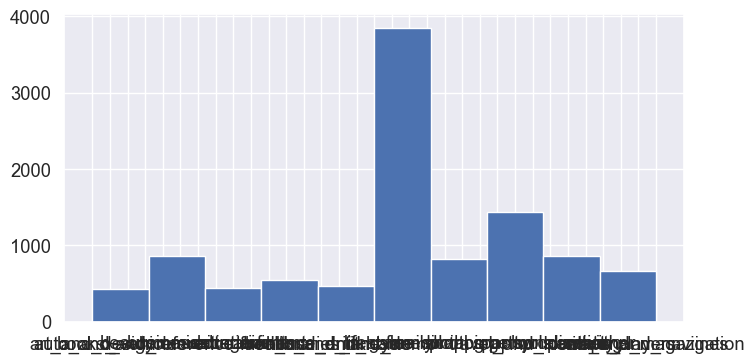

In [131]:
plt.figure(figsize=(8,4))
plt.hist(data['Category'])
# plt.xticks(rotation=70)


H:\install anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

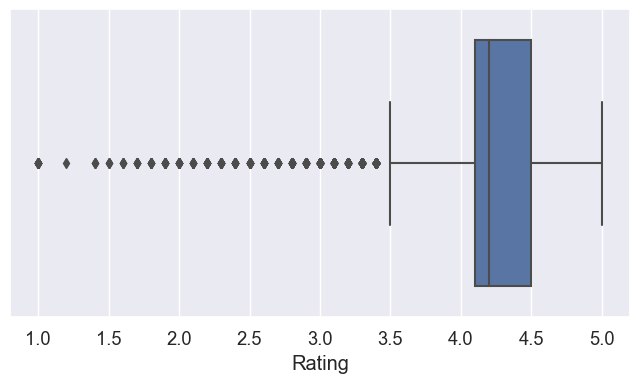

In [133]:
plt.figure(figsize=(8,4))
sns.boxplot(data['Rating'])

<AxesSubplot:xlabel='Size', ylabel='Count'>

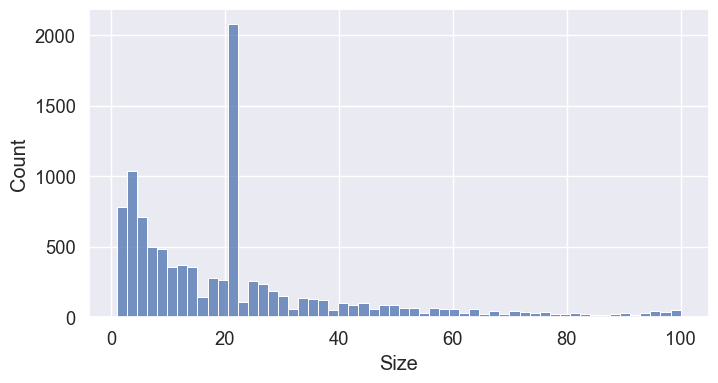

In [136]:
plt.figure(figsize=(8,4))
sns.histplot(data['Size'])

<AxesSubplot:xlabel='Content Rating', ylabel='Count'>

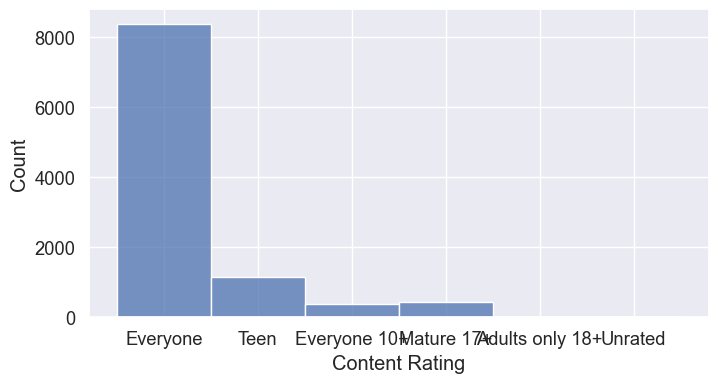

In [138]:
plt.figure(figsize=(8,4))
sns.histplot(data['Content Rating'])

In [139]:
data.sample()

App       Category  Rating  Reviews  Size  Installs  Type  \
7178  Nero AirBurn  video_players     4.2   1008.0   1.7  100,000+  Free   

      Price Content Rating version_y_n  
7178    0.0       Everyone         Yes

In [160]:
px.bar(data , x='version_y_n', y='Price',color='Type')

In [166]:
px.pie(data, values='Rating' , names='Category',width=600, height=500 ,hole=.3)

In [169]:
px.pie(data, values='Rating' , names='Content Rating',width=600, 
       color_discrete_sequence=px.colors.sequential.RdBu,height=500 ,hole=.3)

In [181]:
px.scatter(data,x='Category', y='Rating',size='Size',
           color='Price',width=500, height=500)

In [180]:
px.scatter(data,x='Content Rating', y='Price',size='Size',
           color='Type',width=500, height=400)

In [191]:
px.scatter(data,x='Rating', y='Price',size='Size',
           color='Installs',width=600, height=400)

In [182]:
data.sample()

App             Category  Rating  Reviews  Size Installs  Type  \
7641  Co-op Taxi  maps_and_navigation     3.4    168.0  53.0  10,000+  Free   

      Price Content Rating version_y_n  
7641    0.0       Everyone          No

In [56]:
data.sample(10)

App         Category  Rating  \
10804                             Poker Pro.Fr             game     4.2   
7931                       Amazing Fart Sounds           family     4.0   
6209                         Remix Second Hand         shopping     4.2   
4483                Materialistic P Wallpapers  personalization     4.8   
6485   BBMoji - Your personalized BBM Stickers    communication     4.3   
7847                             CA CS Network           family     4.7   
3895                      Adobe Acrobat Reader     productivity     4.3   
4446                           The Maze Runner             game     4.0   
6677                                        BR        lifestyle     3.0   
1698                    Cut the Rope FULL FREE             game     4.4   

         Reviews       Size      Installs  Type  Price Content Rating  \
10804     5442.0  17.000000      100,000+  Free    0.0           Teen   
7931     28136.0  22.060489    5,000,000+  Free    0.0       Everyone   
6209       867.0   7.500000      100,000+  Free    0.0       Everyone   
4483        24.0   3.600000        1,000+  Free    0.0       Everyone   
6485      8827.0  22.060489    1,000,000+  Free    0.0       Everyone   
7847       160.0  19.000000        5,000+  Free    0.0       Everyone   
3895   3014548.0  22.060489  100,000,000+  Free    0.0       Everyone   
4446    428268.0  22.000000   10,000,000+  Free    0.0       Everyone   
6677       859.0   3.500000      100,000+  Free    0.0       Everyone   
1698   2123381.0  49.000000  100,000,000+  Free    0.0       Everyone   

      version_y_n  
10804          No  
7931           No  
6209          Yes  
4483           No  
6485          Yes  
7847          Yes  
3895           No  
4446           No  
6677           No  
1698          Yes

>Q1: Which Genre has more apps

In [57]:
data['Category'].value_counts().sort_values(ascending=False)

family                 1943
game                   1121
tools                   842
business                427
medical                 408
productivity            407
personalization         388
lifestyle               373
communication           366
finance                 360
sports                  351
photography             322
health_and_fitness      306
social                  280
news_and_magazines      264
travel_and_local        237
books_and_reference     230
shopping                223
dating                  196
video_players           175
maps_and_navigation     137
education               130
food_and_drink          124
entertainment           111
auto_and_vehicles        85
libraries_and_demo       85
weather                  82
house_and_home           80
art_and_design           65
events                   64
parenting                60
comics                   60
beauty                   53
Name: Category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Category'>

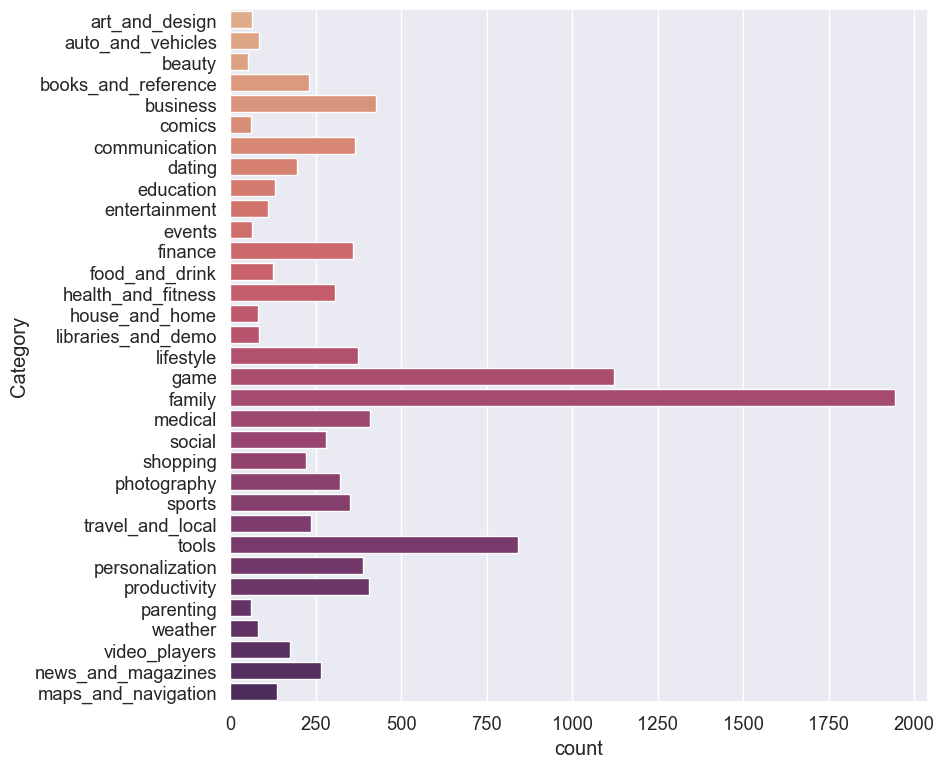

In [58]:
sns.countplot(data=data , y='Category' , palette='flare')

>Q2:What is the average size of the free apps & paid apps.

In [62]:
for c in data['Type'].unique():
    print(c)

Free
Paid


In [63]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'version_y_n'],
      dtype='object')

In [66]:
data.groupby('Type')['Size'].mean()

Type
Free    22.116216
Paid    21.361895
Name: Size, dtype: float64

<AxesSubplot:xlabel='Type', ylabel='Size'>

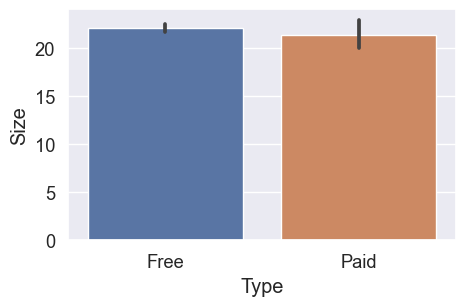

In [72]:
plt.figure(figsize=(5,3))
sns.barplot(data=data , x='Type', y='Size' , estimator=np.mean)

>Q3: What is the 5 top expenisve apps that has rate of 5.

In [76]:
data[data['Rating']==5].sort_values(by='Price', ascending=False).head(5)

App Category  Rating  Reviews  \
5489                  AP Art History Flashcards   family     5.0      1.0   
7477                 USMLE Step 2 CK Flashcards   family     5.0      1.0   
5246                      Hey AJ! It's Bedtime!   family     5.0      1.0   
5482                 meStudying: AP English Lit   family     5.0      1.0   
7204  TI-84 CE Graphing Calculator Manual TI 84   family     5.0      1.0   

           Size Installs  Type  Price Content Rating version_y_n  
5489  96.000000      10+  Paid  29.99     Mature 17+         Yes  
7477  40.000000      10+  Paid  19.99       Everyone          No  
5246  63.000000      10+  Paid   4.99       Everyone          No  
5482  22.060489      10+  Paid   4.99       Everyone          No  
7204  27.000000     100+  Paid   4.99       Everyone         Yes

>Q4:How many apps that has more than 50K reviews

In [86]:
data[data['Reviews']>50000].count()

App               2523
Category          2523
Rating            2523
Reviews           2523
Size              2523
Installs          2523
Type              2523
Price             2523
Content Rating    2523
version_y_n       2523
dtype: int64

>Q5: What is the average price of the apps for each genre with each installs numbers.

In [88]:
pivot=pd.pivot_table(index='Category',columns='Installs',values='Price' , data=data , aggfunc=np.mean)
pivot

Installs               0       0+          1+     1,000+  1,000,000+  \
Category                                                               
art_and_design       NaN    0.000         NaN   0.663333    0.000000   
auto_and_vehicles    NaN      NaN    0.000000   0.000000    0.000000   
beauty               NaN      NaN         NaN   0.000000    0.000000   
books_and_reference  NaN      NaN    5.990000   0.149118    0.000000   
business             NaN    0.000    0.000000   0.183265    0.000000   
comics               NaN      NaN         NaN   0.000000    0.000000   
communication        NaN      NaN    0.000000   0.294091    0.066444   
dating               NaN      NaN    0.000000   0.537692    0.000000   
education            NaN      NaN         NaN   4.990000    0.000000   
entertainment        NaN      NaN         NaN        NaN    0.000000   
events               NaN      NaN  109.990000   0.000000    0.000000   
family               0.0    2.490    0.846000   0.500093    0.036989   
finance              NaN  212.990    8.745000  30.148750    0.000000   
food_and_drink       NaN      NaN    0.000000   0.000000    0.000000   
game                 NaN      NaN    1.090000   0.812250    0.121463   
health_and_fitness   NaN      NaN    0.000000   0.950476    0.000000   
house_and_home       NaN      NaN    0.000000   0.000000    0.000000   
libraries_and_demo   NaN      NaN         NaN   0.000000    0.000000   
lifestyle            NaN  399.990    0.000000   9.726364    0.133111   
maps_and_navigation  NaN      NaN         NaN   0.066000    0.000000   
medical              NaN  200.000    1.138571   6.192727    0.000000   
news_and_magazines   NaN    0.000         NaN   0.000000    0.000000   
parenting            NaN      NaN         NaN   0.000000    0.000000   
personalization      NaN    1.490    0.708571   0.709048    0.097174   
photography          NaN      NaN         NaN   1.831667    0.115192   
productivity         NaN  154.990    0.000000   0.744000    0.000000   
shopping             NaN      NaN         NaN   0.000000    0.000000   
social               NaN    6.995    0.000000   0.043043    0.000000   
sports               NaN      NaN    0.000000   0.950909    0.043261   
tools                NaN      NaN    0.298000   0.589878    0.029604   
travel_and_local     NaN    3.990    0.000000   0.566957    0.000000   
video_players        NaN      NaN         NaN   0.110000    0.000000   
weather              NaN      NaN         NaN   1.747500    0.000000   

Installs             1,000,000,000+       10+    10,000+  10,000,000+  \
Category                                                                
art_and_design                  NaN       NaN   0.180909     0.000000   
auto_and_vehicles               NaN  0.000000   0.000000     0.000000   
beauty                          NaN       NaN   0.000000     0.000000   
books_and_reference             0.0  3.996842   0.179600     0.000000   
business                        NaN  2.201905   0.065000     0.000000   
comics                          NaN       NaN   0.000000     0.000000   
communication                   0.0  1.392105   0.478400     0.000000   
dating                          NaN  0.000000   0.362727     0.000000   
education                       NaN       NaN   0.000000     0.000000   
entertainment                   0.0       NaN   0.000000     0.000000   
events                          NaN  0.000000   0.000000          NaN   
family                          0.0  2.210656   4.063144     0.082722   
finance                         NaN  0.000000   0.318551     0.000000   
food_and_drink                  NaN  0.000000   0.387778     0.000000   
game                            0.0  0.066000   1.185625     0.004459   
health_and_fitness              NaN  0.066000   0.645882     0.000000   
house_and_home                  NaN  0.000000   0.000000     0.000000   
libraries_and_demo              NaN  0.000000   0.000000     0.000000   
lifestyle          

>Q6:How many apps have rating > 4.7 and what is thier avg price.

In [90]:
data[data['Rating']>4.7]['Price'].mean()

0.4550000000000003

>Q7: How much google earned from the 5,000,000+ installed apps

In [91]:
data.groupby('Installs')['Price'].mean()

Installs
0                  0.000000
0+                86.100714
1+                 2.675970
1,000+             2.722090
1,000,000+         0.036485
1,000,000,000+     0.000000
10+                1.163013
10,000+            2.302420
10,000,000+        0.013248
100+               1.126451
100,000+           0.721426
100,000,000+       0.000000
5+                 0.870488
5,000+             3.021279
5,000,000+         0.000000
50+                0.537843
50,000+            1.240232
50,000,000+        0.000000
500+               0.410427
500,000+           0.074236
500,000,000+       0.000000
Name: Price, dtype: float64

>Q8: What is the max and min size for free and paid apps.

In [92]:
data.groupby('Type')['Size'].describe()

count       mean        std  min  25%   50%   75%    max
Type                                                           
Free  9590.0  22.116216  20.503099  1.0  6.7  20.0  26.0  100.0
Paid   765.0  21.361895  20.227321  1.0  5.4  20.0  25.0  100.0

<AxesSubplot:xlabel='Type', ylabel='Size'>

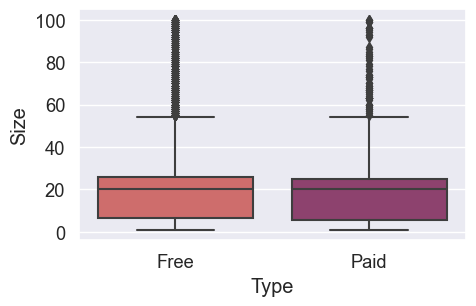

In [100]:
plt.figure(figsize=(5,3))
sns.boxplot(x='Type', y='Size', data=data, palette='flare')

>Q9:is there a correlation between rating, Reviews, Size with the price of the app

In [97]:
data.corr()

Rating   Reviews      Size     Price
Rating   1.000000  0.068602  0.065390 -0.020601
Reviews  0.068602  1.000000  0.129875 -0.009418
Size     0.065390  0.129875  1.000000 -0.022526
Price   -0.020601 -0.009418 -0.022526  1.000000

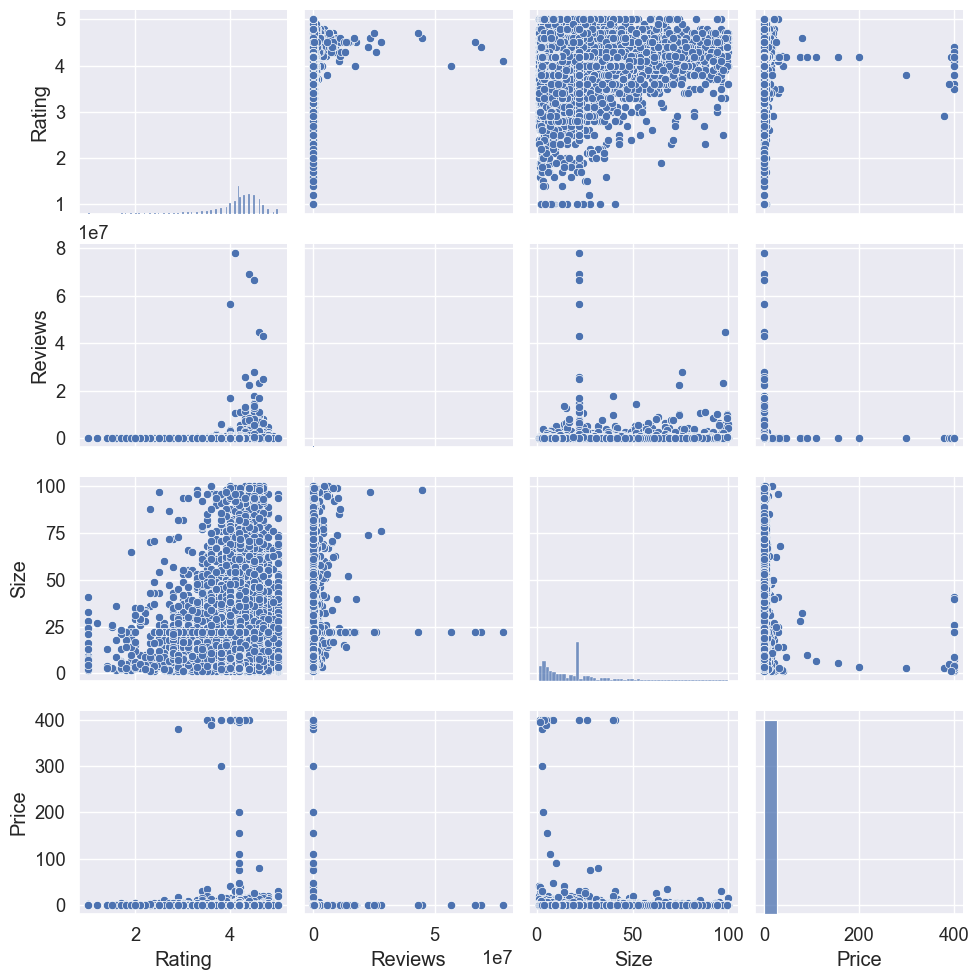

In [102]:
sns.pairplot(data)

<AxesSubplot:>

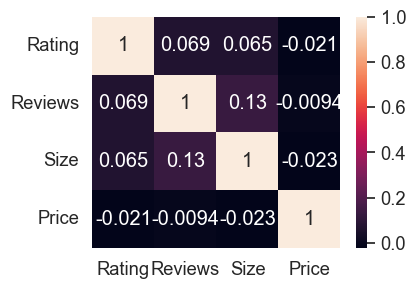

In [109]:
plt.figure(figsize=(4,3))
sns.heatmap(data.corr(), annot=True)

>Q11:How many apps for each type for each content reading.

In [110]:
x = pd.pivot_table(index='Type', columns='Content Rating', values='Rating', data=data, aggfunc='count')
x

Content Rating  Adults only 18+  Everyone  Everyone 10+  Mature 17+    Teen  \
Type                                                                          
Free                        3.0    7718.0         345.0       428.0  1094.0   
Paid                        NaN     662.0          32.0        19.0    52.0   

Content Rating  Unrated  
Type                     
Free                2.0  
Paid                NaN

In [112]:
data.sample()

App Category  Rating  Reviews  Size  Installs  Type  \
5272  How it works: AK-74N   family     4.4   1031.0  48.0  100,000+  Free   

      Price Content Rating version_y_n  
5272    0.0       Everyone         Yes

>Q12: How many apps that can work on android version 4

In [113]:
data['version_y_n'].value_counts()

Yes    6698
No     3657
Name: version_y_n, dtype: int64

>Q13:What is the most expensive app on the store.

In [60]:
data[data['Price']==data['Price'].max()]

App   Category  Rating  Reviews  Size Installs  \
4367  I'm Rich - Trump Edition  lifestyle     3.6    275.0   7.3  10,000+   

      Type  Price Content Rating version_y_n  
4367  Paid  400.0       Everyone         Yes

In [61]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'version_y_n'],
      dtype='object')